# Markov Chains

We can use Markov chains to identify the probability of the next word. For example below, We can see that the most likely word after a verb is a noun. 

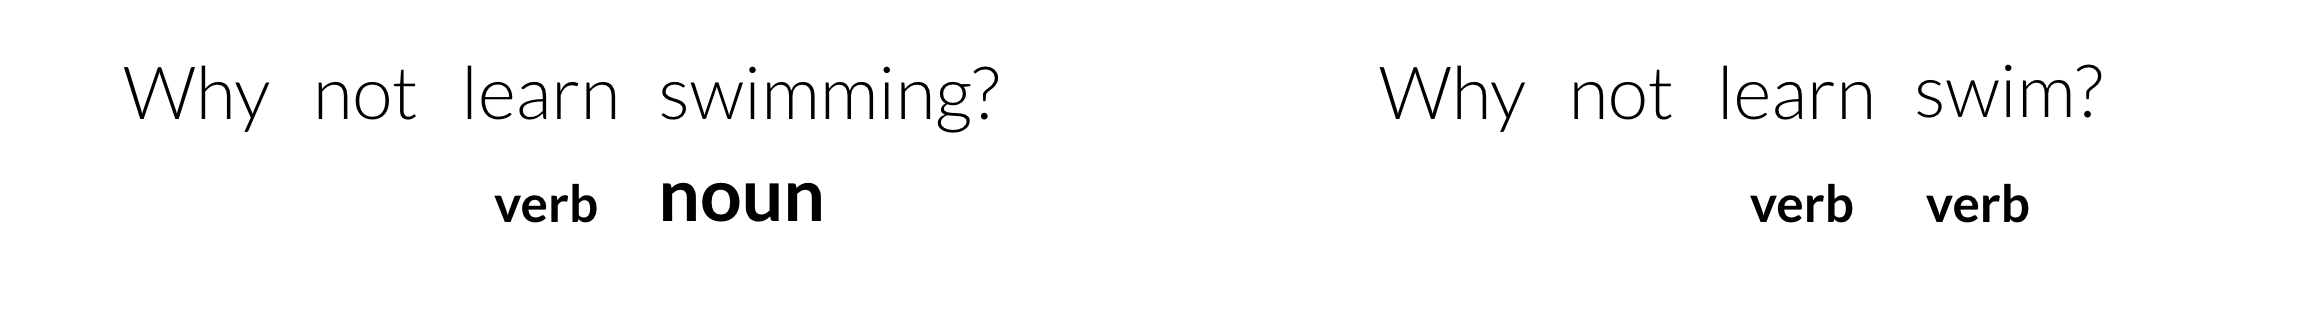

To properly model the probabilities we need to identify the probabilities of the POS tags and for the words. 

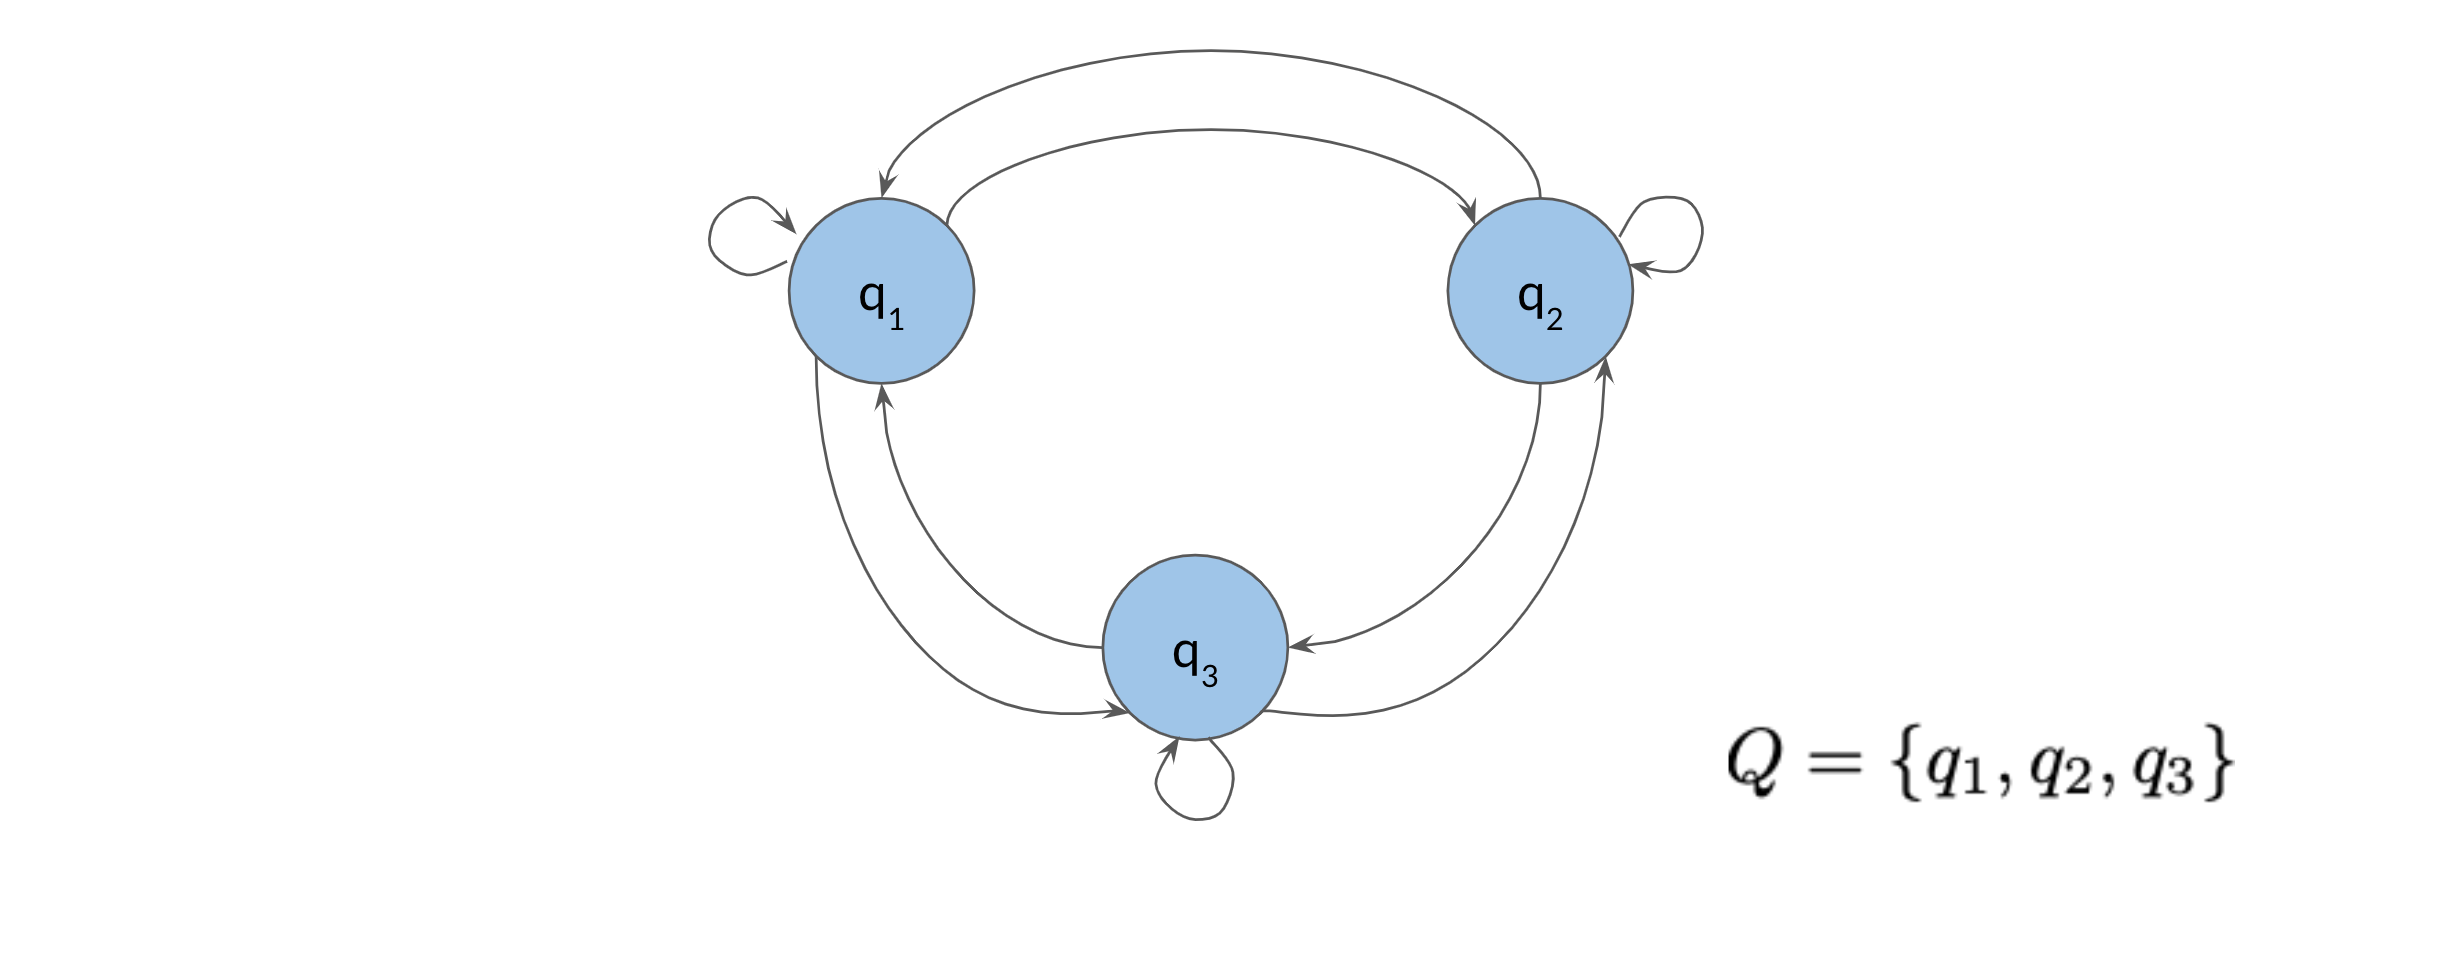

The circles of the graph represent the states of your model. A state refers to a certain condition of the present moment.  You can think of these as the POS tags of the current word.

Q={q1​,q2​,q3​} is the set of all states in your model. 

# Markov Chains and POS Tags

To help identify the parts of speech for every word, we need to build a transition matrix that gives you the probabilities from one state to another.  

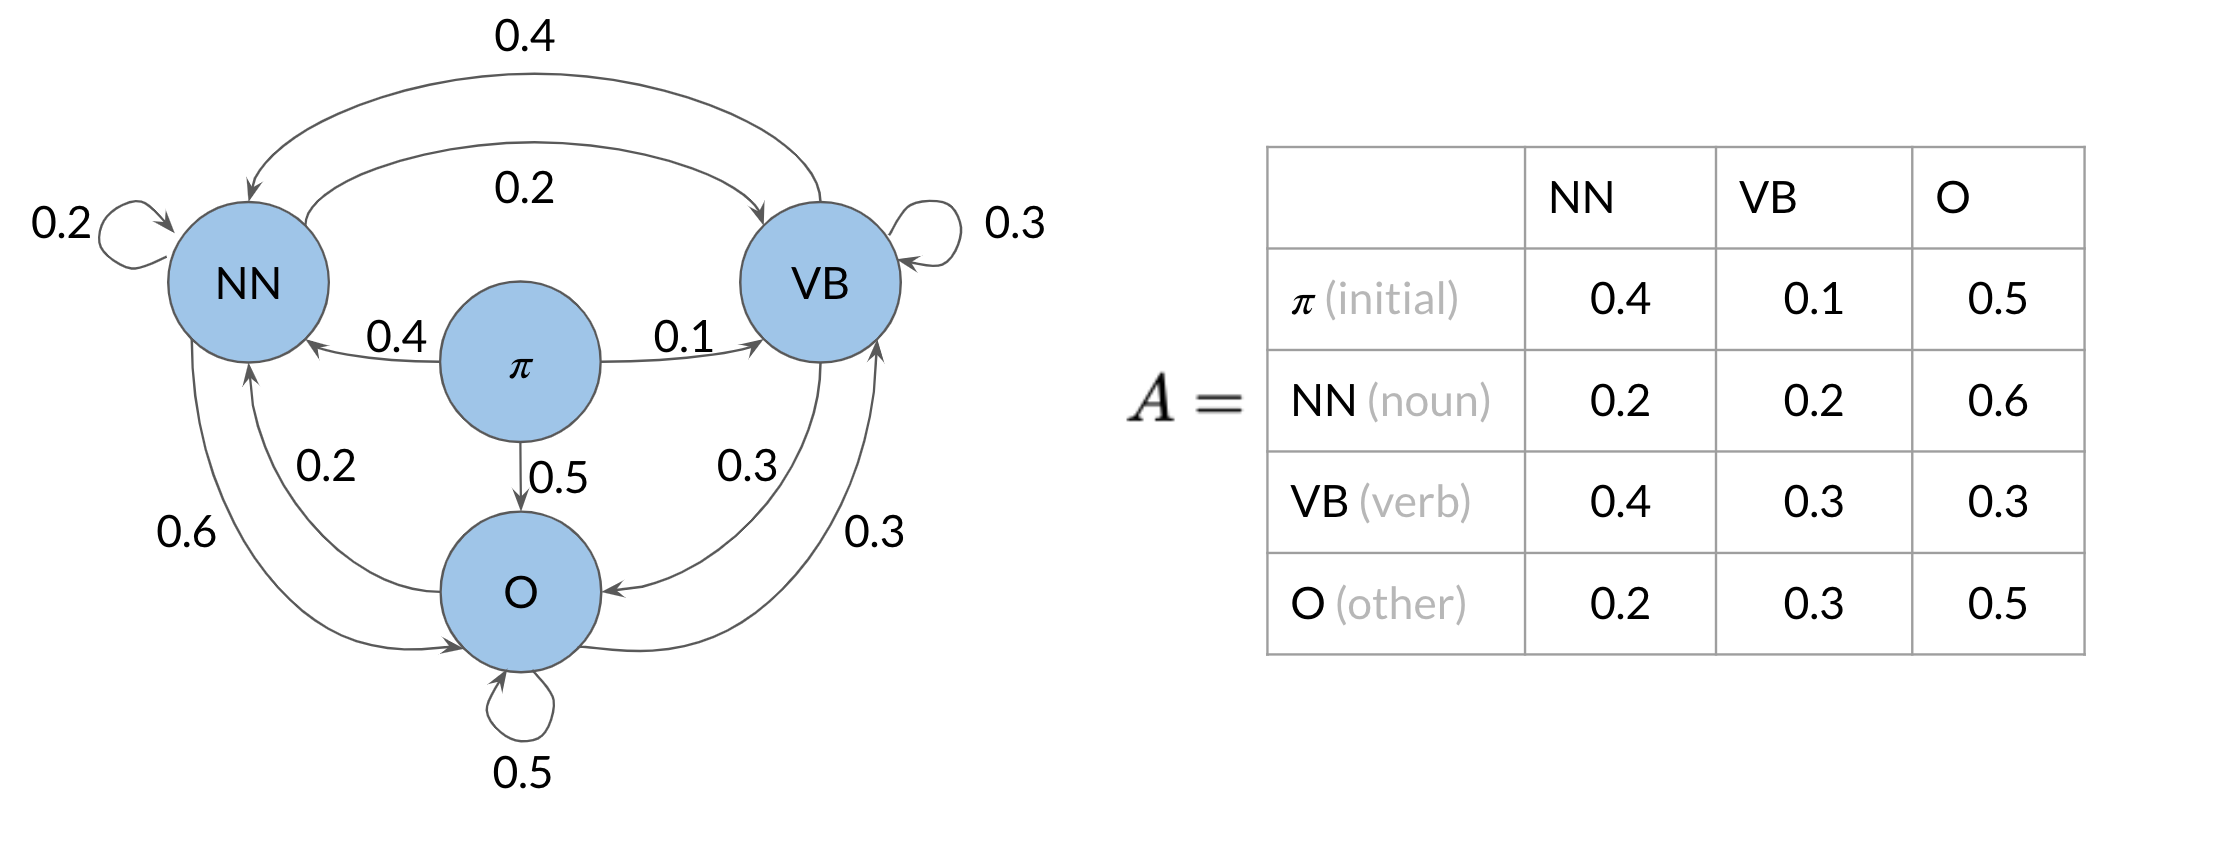

In the diagram above, the blue circles correspond to the part of speech tags, and the arrows correspond to the transition probabilities from one part of speech to another. You can populate the table on the right from the diagram on the left. The first row in your A matrix corresponds to the initial distribution among all the states. According to the table, the sentence has a 40% chance to start as a noun, 10% chance to start with a verb, and a 50% chance to start with another part of speech tag. 

In more general notation, we can write the transition matrix A, given some states Q, as follows: 

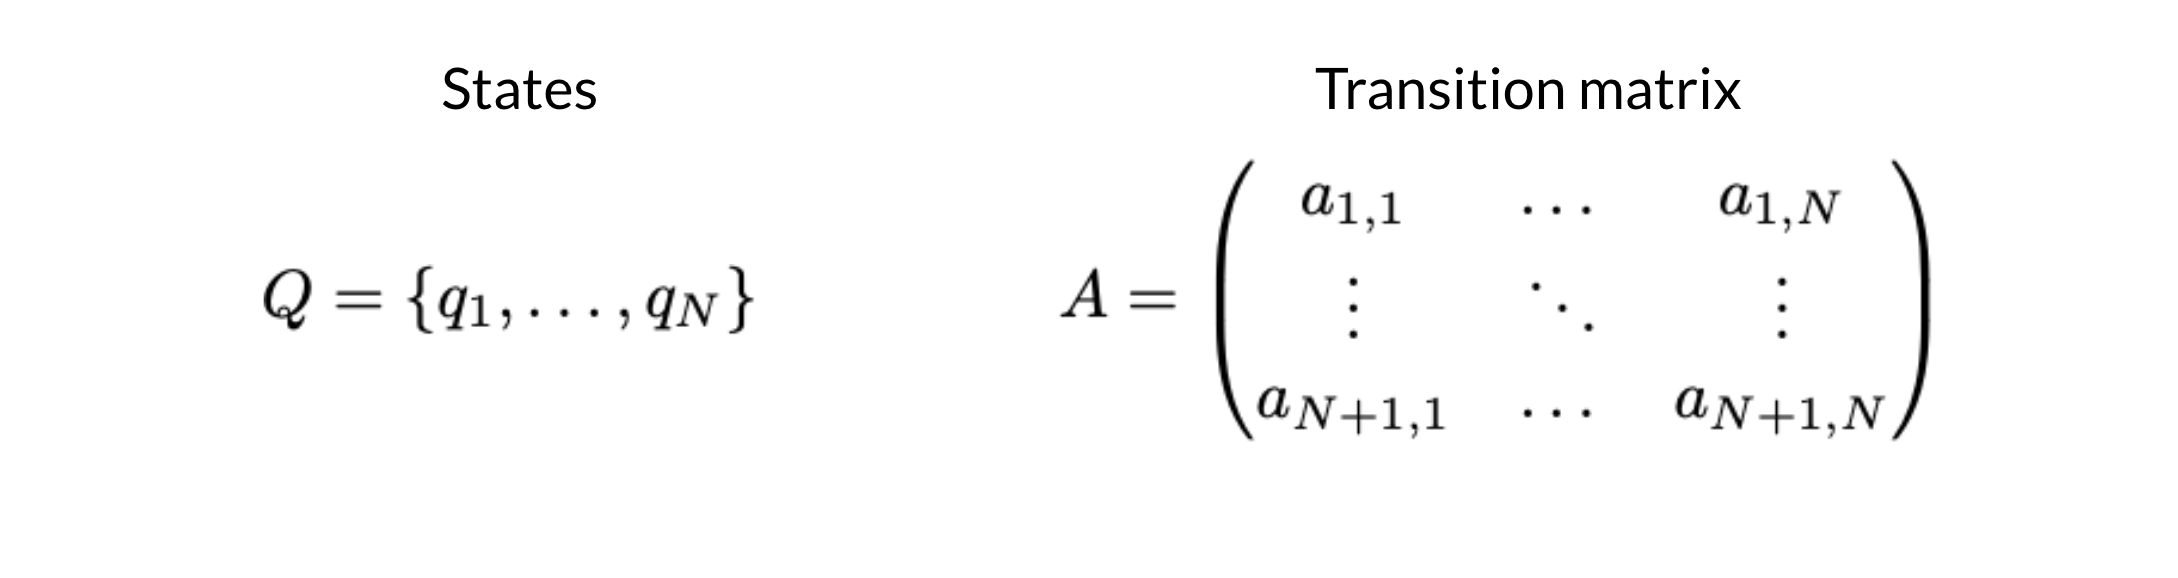

# Hidden Markov Models

In hidden markov models we make use of emission probabilities that give the probability to go from one state (POS tag) to a specific word. 

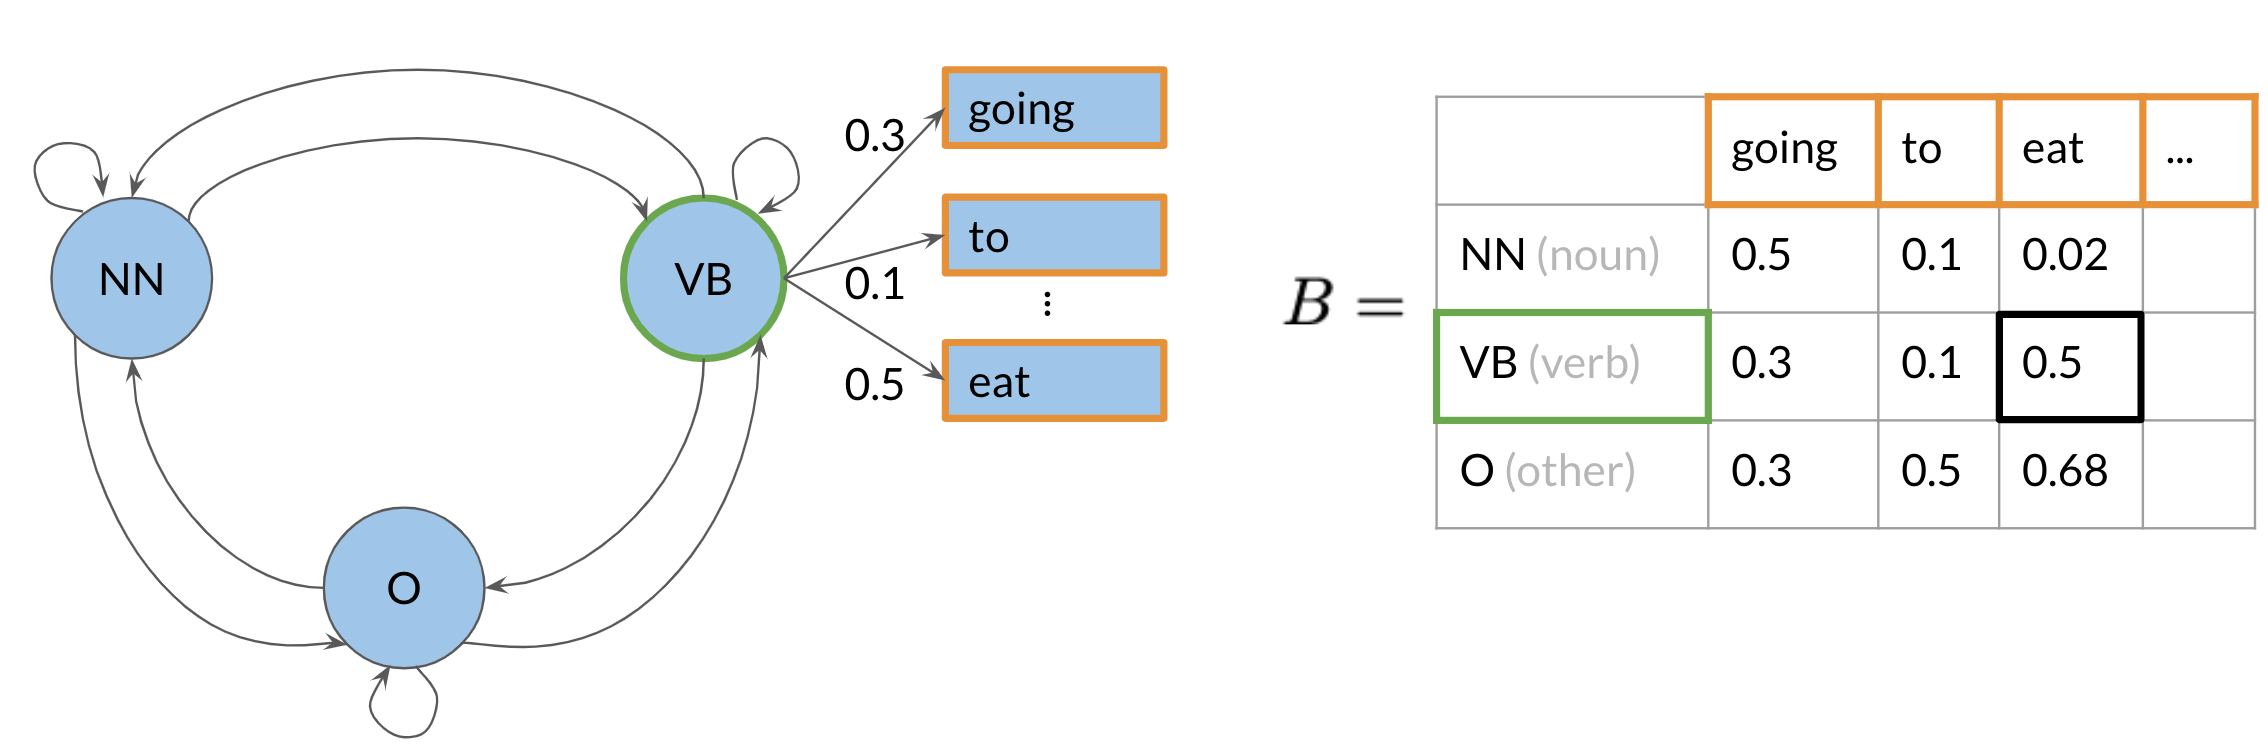


For example, given that we are in a verb state, we can go to other words with certain probabilities. This emission matrix B, will be used with your transition matrix A, to help us identify the part of speech of a word in a sentence. To populate our matrix B, we can just have a labelled dataset and compute the probabilities of going from a POS to each word in our vocabulary. Here is a recap of what we have seen so far: 

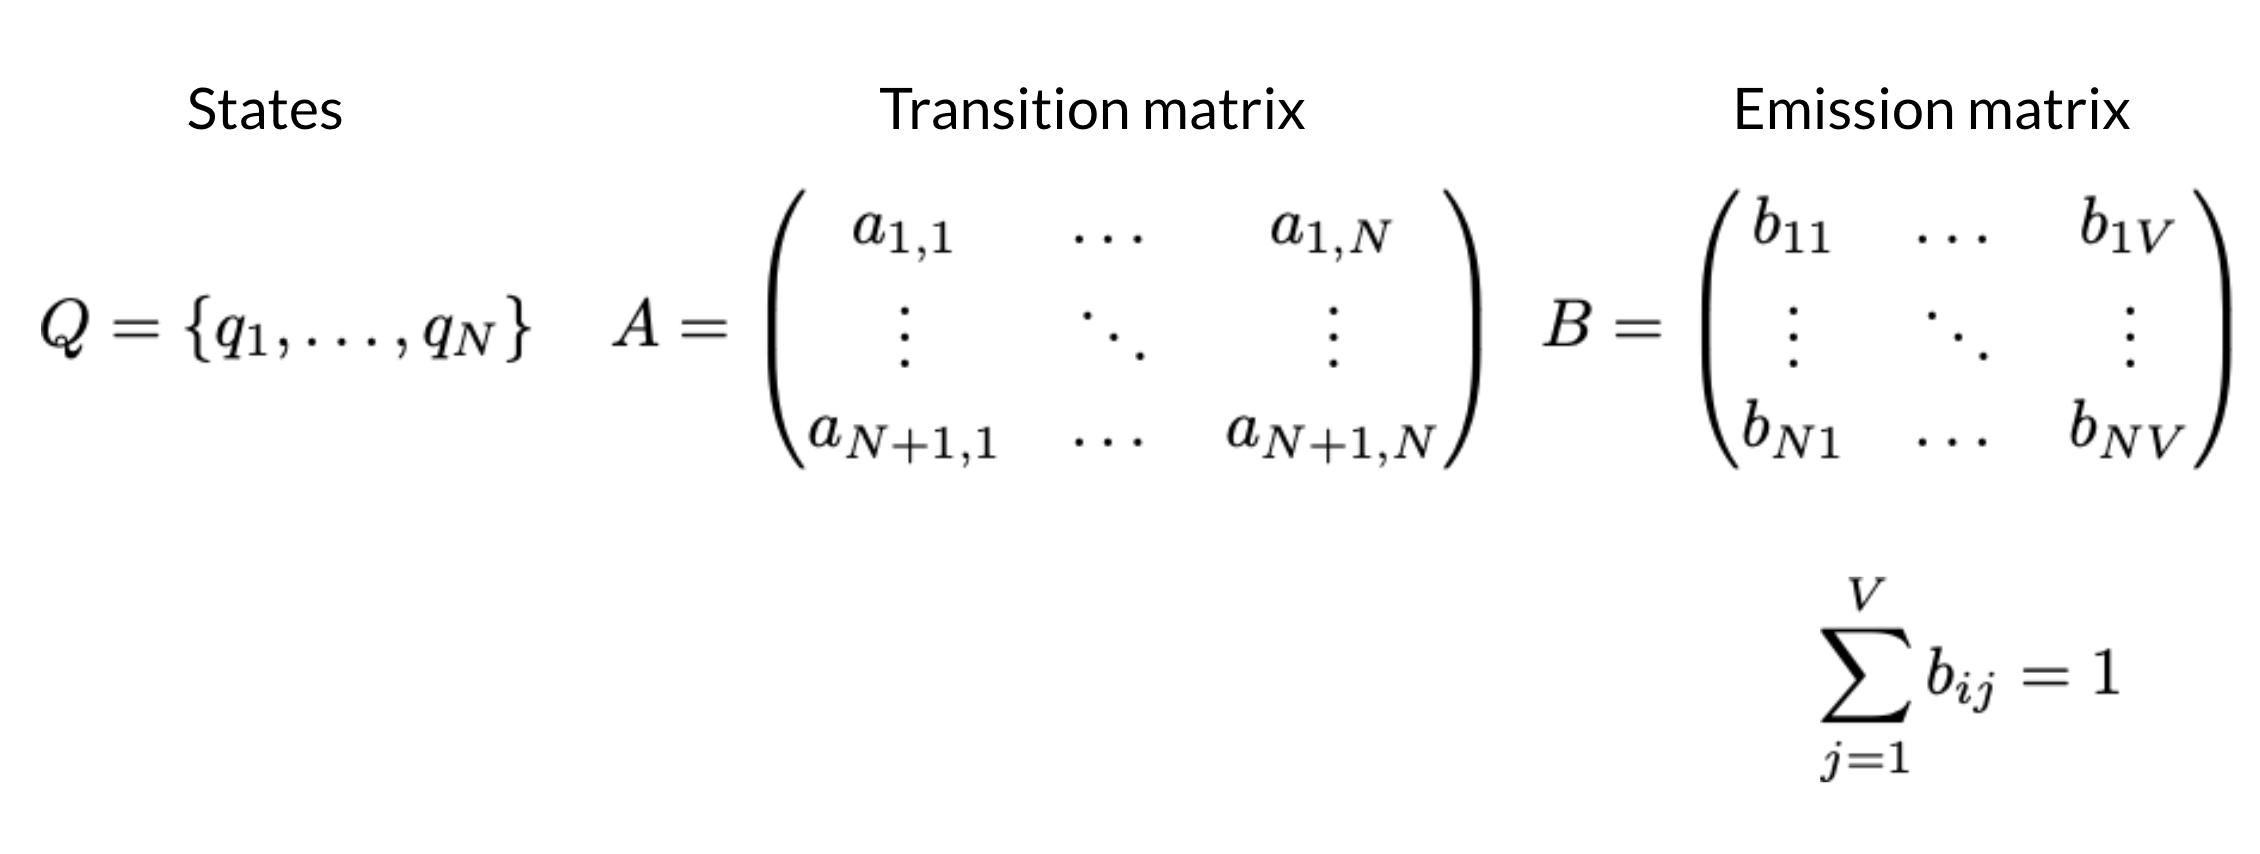

Note that the sum of each row in your A and B matrix has to be 1. Next, I will show how we can calculate the probabilities inside these matrices.

# Calculating Probabilities

Here is a visual representation on how to calculate the probabilities:

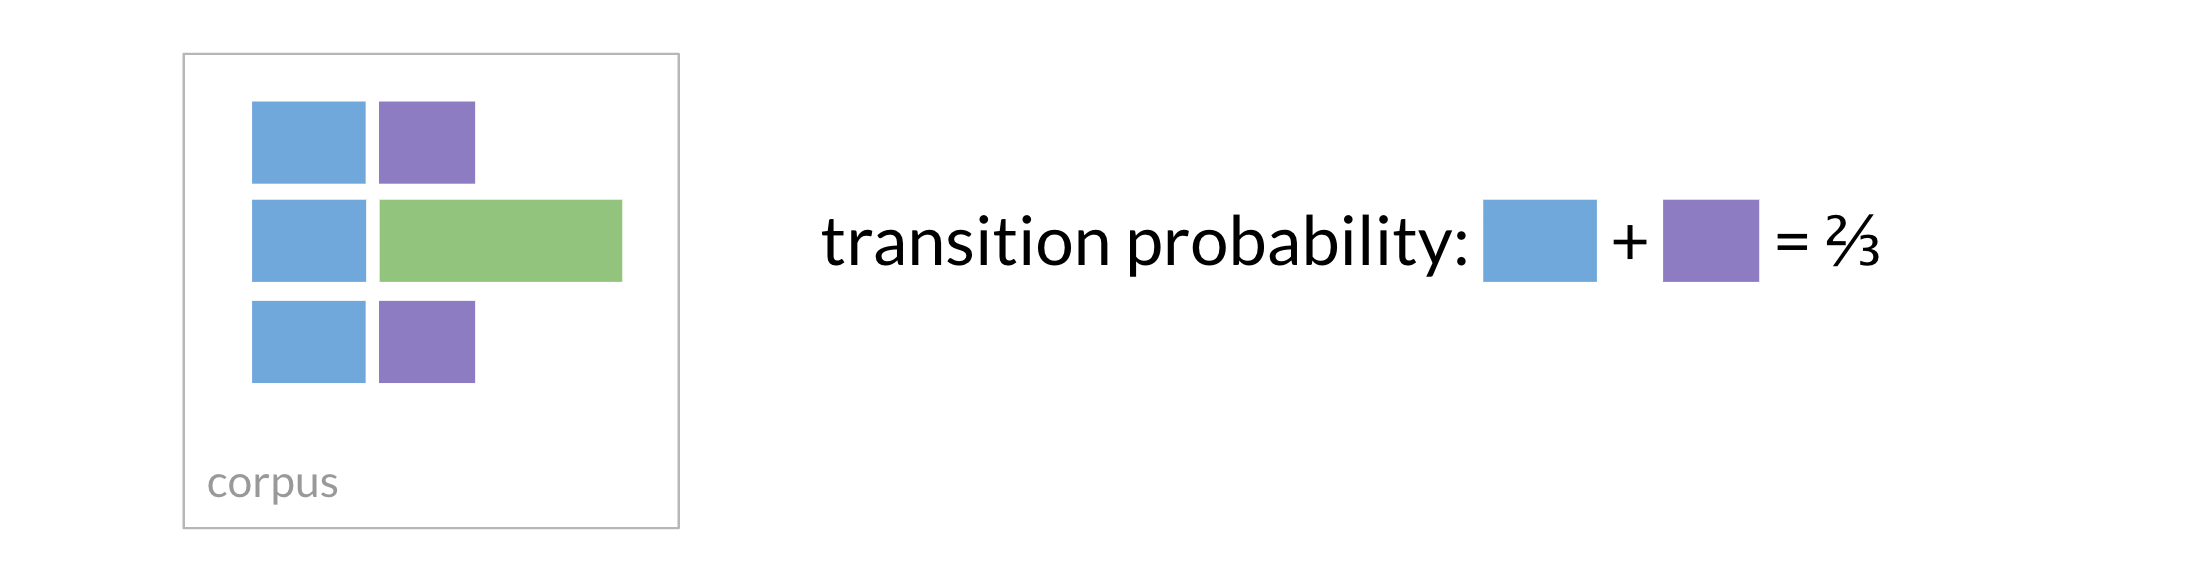

The number of times that blue is followed by purple is 2 out of 3. We will use the same logic to populate our transition and emission matrices. In the transition matrix we will count the number of times tag t(i−1),t(i)t(i−1)​,t(i)​ show up near each other and divide by the total number of times t(i−1)t(i−1)​ shows up (which is the same as the number of times it shows up followed by anything else).

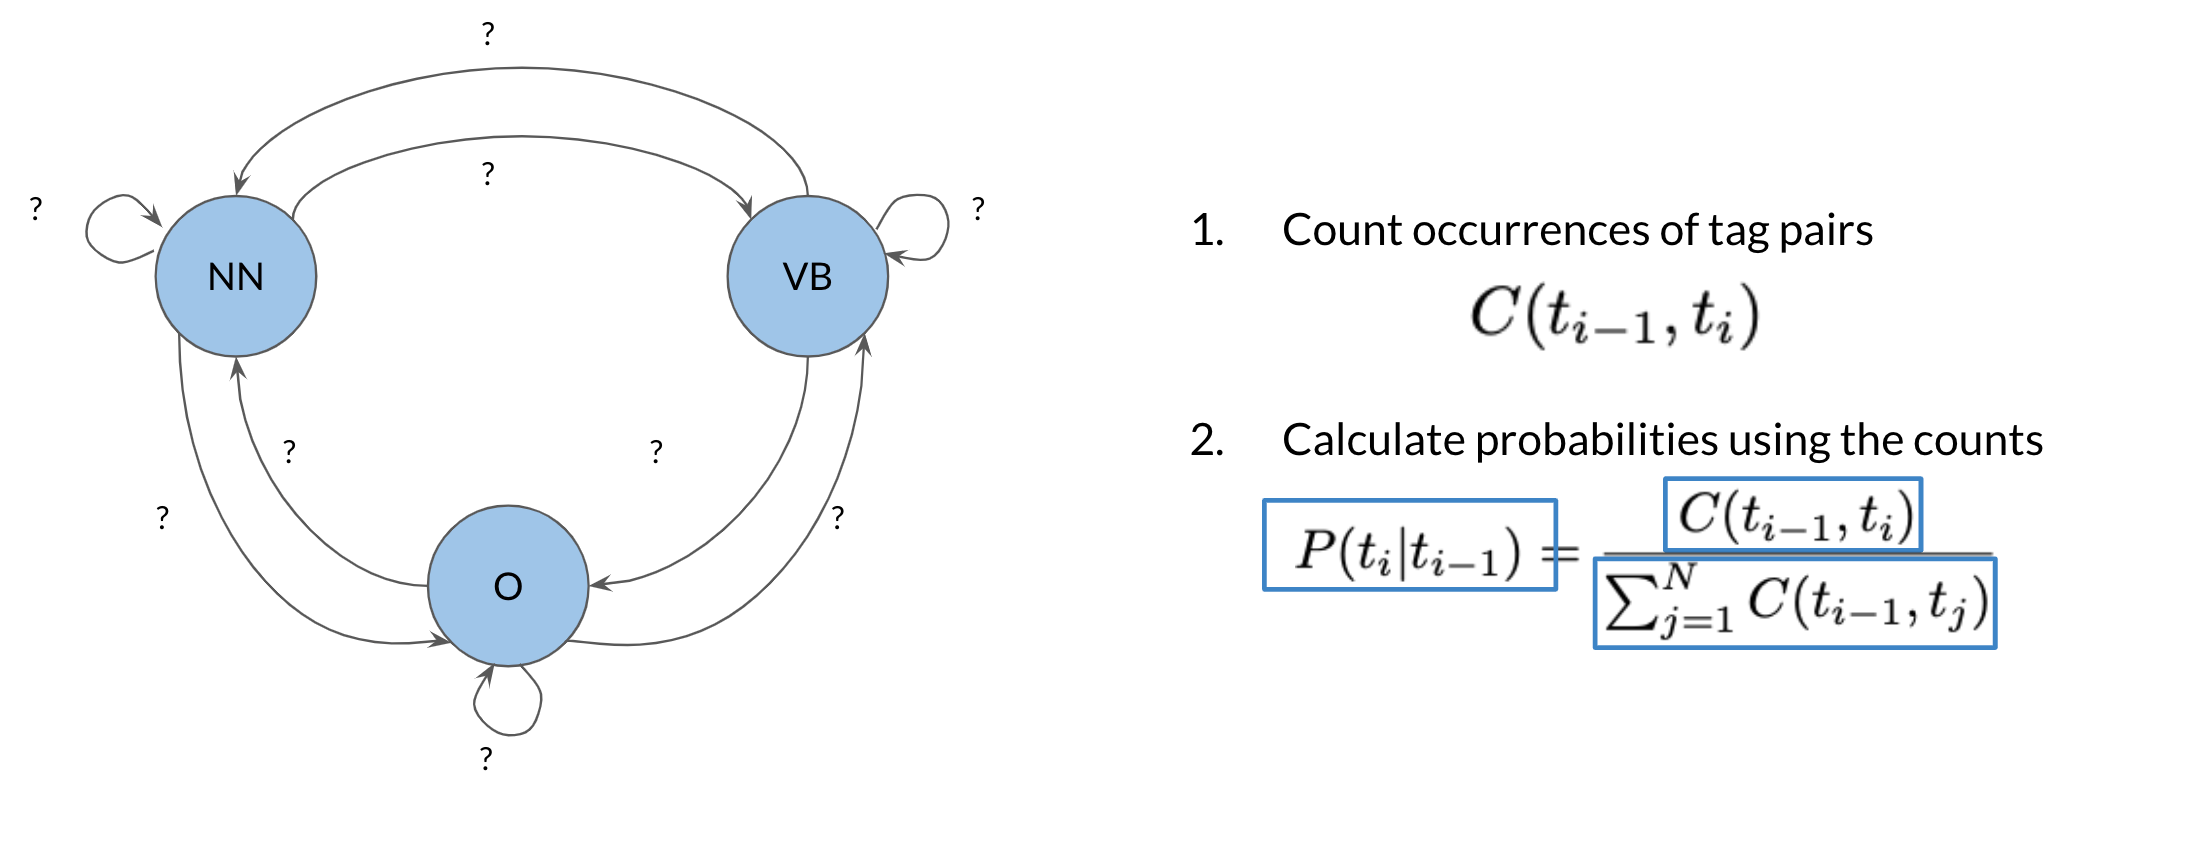

C(t(i−1)​,t(i)​) is the count of times tag (i-1) shows up before tag i. From this we can compute the probability that a tag shows up after another tag. 

# Populating the Transition Matrix

To populate the transition matrix we have to keep track of the number of times each tag shows up before another tag. 

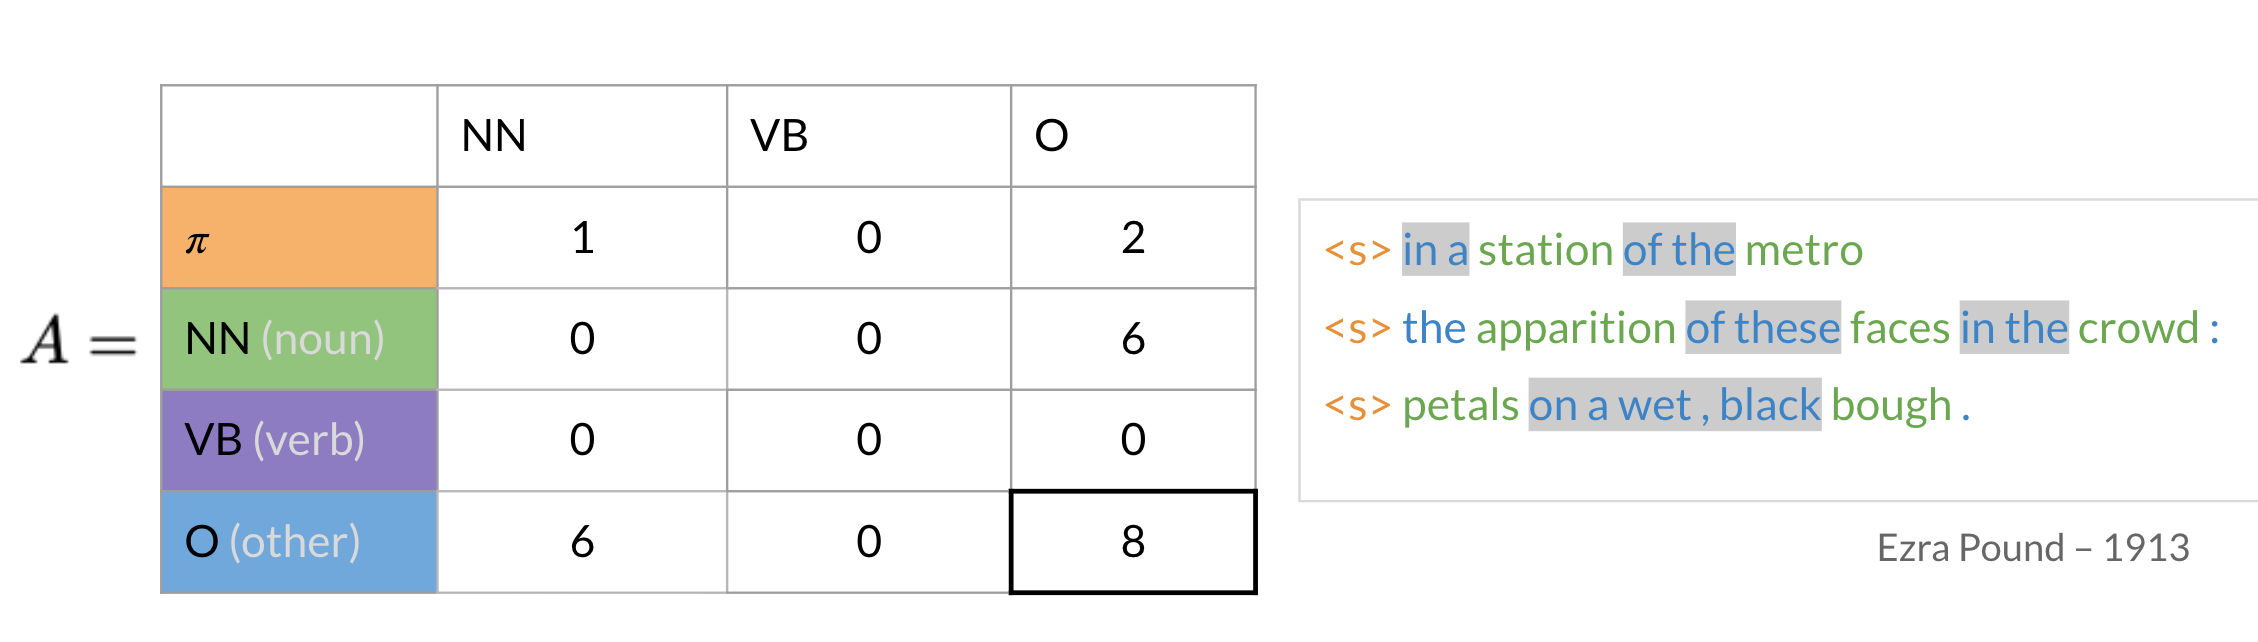

In the table above, we can see that green corresponds to nouns (NN), purple corresponds to verbs (VB), and blue corresponds to other (O). Orange (ππ)  corresponds to the initial state. The numbers inside the matrix correspond to the number of times a part of speech tag shows up right after another one. 

To go from O to NN or in other words to calculate P(NN∣O)P(NN∣O) we have to compute the following: 

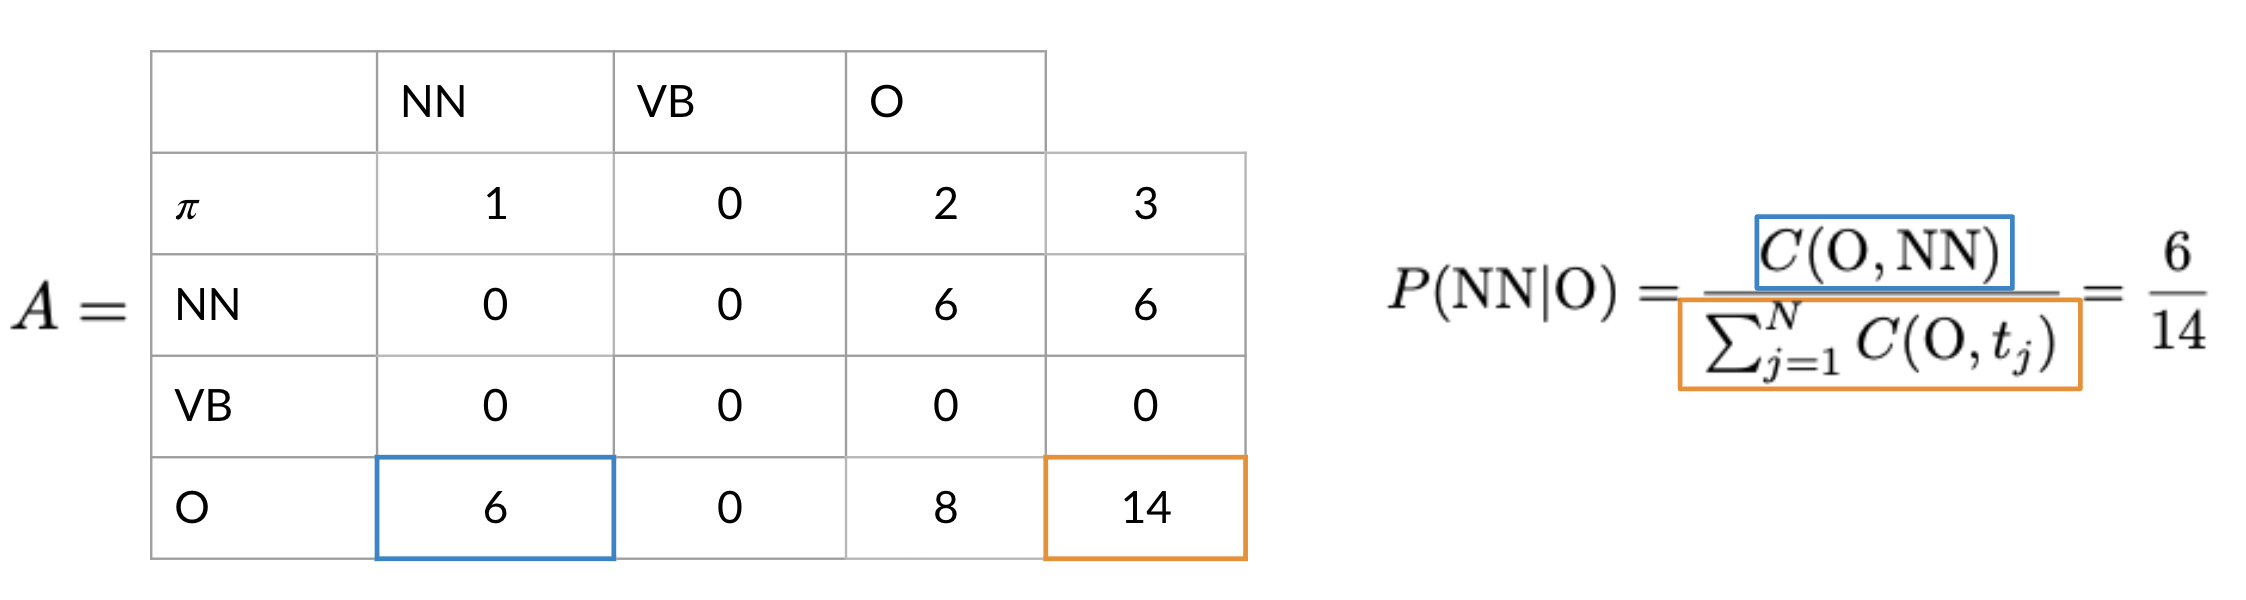

To generalize:

P(ti∣ti−1)=C(ti−1,ti) / ∑j=1NC(ti−1,tj)P(ti​∣ti−1​)

Unfortunately, sometimes you might not see two POS tags in front each other. This will give you a probability of 0. To solve this issue, you will `smooth` it as follows: 

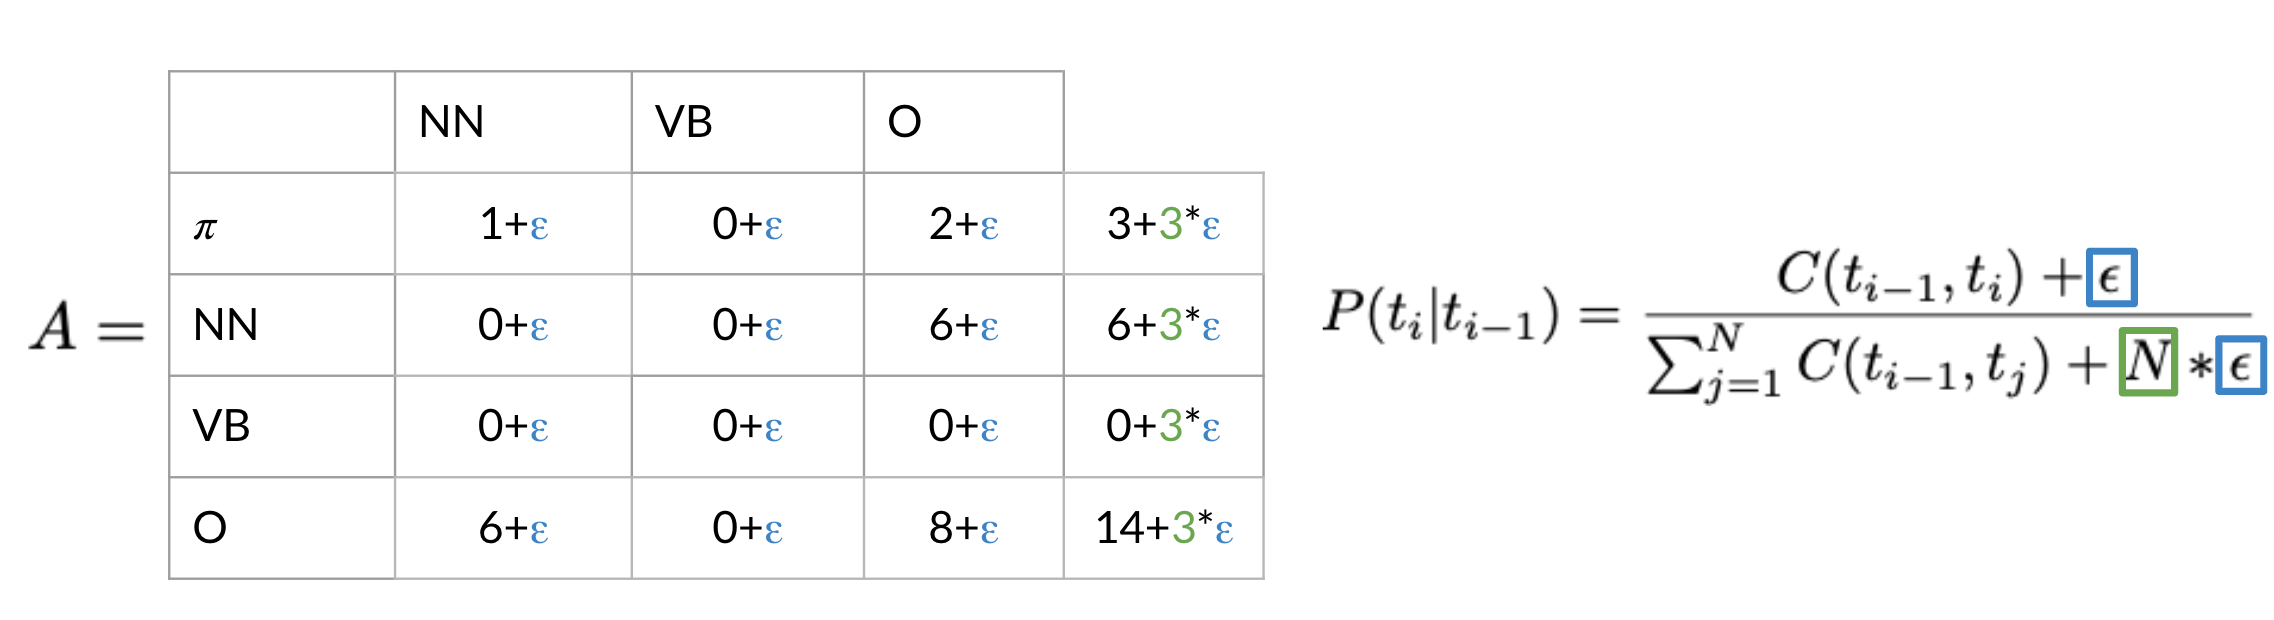

The ϵ allows you to not have any two sequences showing up with 0 probability. Why is this important? 

# Parts-of-Speech Tagging - Working with tags and Numpy

Today, we will create a matrix using some tag information and then modify it using different approaches.
This will serve as hands-on experience working with Numpy and as an introduction to some elements used for POS tagging.

In [1]:
# Libraries
import numpy as np
import pandas as pd


In [2]:
# Define tags for Adverb, Noun and To (the preposition) , respectively
tags = ['RB', 'NN', 'TO']

In [3]:
# Define 'transition_counts' dictionary
transition_counts = {
    ('NN', 'NN'): 16241,
    ('RB', 'RB'): 2263,
    ('TO', 'TO'): 2,
    ('NN', 'TO'): 5256,
    ('RB', 'TO'): 855,
    ('TO', 'NN'): 734,
    ('NN', 'RB'): 2431,
    ('RB', 'NN'): 358,
    ('TO', 'RB'): 200
}

`transition_counts` which counts the number of times a particular tag happened next to another. The keys of this dictionary have the form `(previous_tag, tag)` and the values are the frequency of occurrences.

Notice that there are 9 combinations of the 3 tags used. Each tag can appear after the same tag so you should include those as well.


In [5]:
# Store the number of tags in the 'num_tags' variable
num_tags = len(tags)

# Initialize a 3X3 numpy array with zeros
transition_matrix = np.zeros((num_tags, num_tags))

# Print matrix
transition_matrix

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [6]:
# Print shape of the matrix
transition_matrix.shape

(3, 3)

Before filling this matrix with the values of the `transition_counts` dictionary you should sort the tags so that their placement in the matrix is consistent:


In [7]:
# Create sorted version of the tag's list
sorted_tags = sorted(tags)

# Print sorted list
sorted_tags

['NN', 'RB', 'TO']

In [9]:
# loop rows
for i in range(num_tags):
    # Loop column
    for j in range(num_tags):
        # Defining tag tuple
        tag_tuple = (sorted_tags[i], sorted_tags[j])
        # Get frequency from transition_counts dict and assign to (i, j) position in the matrix
        transition_matrix[i, j] = transition_counts.get(tag_tuple)

# Print matrix
transition_matrix

array([[1.6241e+04, 2.4310e+03, 5.2560e+03],
       [3.5800e+02, 2.2630e+03, 8.5500e+02],
       [7.3400e+02, 2.0000e+02, 2.0000e+00]])

Looks like this worked fine. However the matrix can be hard to read as `Numpy` is more about efficiency, rather than presenting values in a pretty format. 

For this we can use a `Pandas DataFrame`. In particular, a function that takes the matrix as input and prints out a pretty version of it will be very useful:

In [10]:
# Define 'print_matrix' function
def print_matrix(matrix):
    print(pd.DataFrame(matrix, index=sorted_tags, columns=sorted_tags))

Notice that the tags are not a parameter of the function. This is because the sorted_tags list will not change in the rest of the notebook so it is safe to use the variable previously declared. To test this function simply run: 

In [11]:
# Print the 'transition_matrix' by calling the 'print_matrix' function
print_matrix(transition_matrix)

         NN      RB      TO
NN  16241.0  2431.0  5256.0
RB    358.0  2263.0   855.0
TO    734.0   200.0     2.0


### Working with Numpy for matrix manipulation

`Numpy` allows vectorized operations which means that operations that would normally include looping over the matrix can be done in a simpler manner. This is consistent with treating numpy arrays as matrices since we can get support for common matrix operations. We can do matrix multiplication, scalar multiplication, vector addition and many more!

For instance try scaling each value in the matrix by a factor of 110
. Normally we would loop over each value in the matrix, updating them accordingly. But in Numpy this is as easy as dividing the whole matrix by 10:

In [12]:
# Scale transition matrix
transition_matrix = transition_matrix/10

# Print scaled matrix
print_matrix(transition_matrix)

        NN     RB     TO
NN  1624.1  243.1  525.6
RB    35.8  226.3   85.5
TO    73.4   20.0    0.2


In [13]:
# Compute sum of row for each row
rows_sum = transition_matrix.sum(axis=1, keepdims=True)

# Print sum of rows
rows_sum

array([[2392.8],
       [ 347.6],
       [  93.6]])

The `keepdims` parameter was set to True so the resulting array had shape (3, 1) rather than (3,). This was done so that the axes were consistent with the desired operation. 

In [14]:
# Normalize transition matrix
transition_matrix = transition_matrix / rows_sum

# Print normalized matrix
print_matrix(transition_matrix)

          NN        RB        TO
NN  0.678745  0.101596  0.219659
RB  0.102992  0.651036  0.245972
TO  0.784188  0.213675  0.002137


Notice that the normalization that was carried out forces the sum of each row to be equal to 1. We can easily check this by running the sum method on the resulting matrix:


In [15]:
transition_matrix.sum(axis=1, keepdims=True)

array([[1.],
       [1.],
       [1.]])

When we are asked to modify each value of the diagonal of the matrix so that they are equal to the log of the sum of the current row plus the current value. When doing mathematical operations like this one don't forget to import the math module.



In [16]:
import math

# Copy transition matrix for for-loop example
t_matrix_for = np.copy(transition_matrix)

# Copy transition matrix for numpy functions example
t_matrix_np = np.copy(transition_matrix)

### Using a for-loop

In [17]:
# Loop values in the diagonal
for i in range(num_tags):
    t_matrix_for[i, i] =  t_matrix_for[i, i] + math.log(rows_sum[i])

# Print matrix
print_matrix(t_matrix_for)

          NN        RB        TO
NN  8.458964  0.101596  0.219659
RB  0.102992  6.502088  0.245972
TO  0.784188  0.213675  4.541167


/tmp/ipykernel_19624/84584535.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  t_matrix_for[i, i] =  t_matrix_for[i, i] + math.log(rows_sum[i])


### Using vectorization

In [18]:
# Save diagonal in a numpy array
d = np.diag(t_matrix_np)

# Print shape of diagonal
d.shape

(3,)

In [19]:
# Reshape diagonal numpy array
d = np.reshape(d, (3,1))

# Print shape of diagonal
d.shape

(3, 1)

In [23]:
# Perform the vectorized operation
d = d + np.vectorize(math.log)(rows_sum)

# Use numpy's 'fill_diagonal' function to update the diagonal
np.fill_diagonal(t_matrix_np, d)

# Print the matrix
print_matrix(t_matrix_np)

           NN         RB         TO
NN  31.799623   0.101596   0.219659
RB   0.102992  24.055245   0.245972
TO   0.784188   0.213675  18.158258


`fill_diagonal()` --> update the original matrix

In [24]:
# Check for equality
t_matrix_for == t_matrix_np

array([[False,  True,  True],
       [ True, False,  True],
       [ True,  True, False]])